<a href="https://colab.research.google.com/github/ngcheeyuan/Classification_projects/blob/main/Wine_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"cheeyuanng","key":"70085cb366ad542072c5a36ba0e09e27"}'}

In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [10]:
!kaggle datasets download -d yasserh/wine-quality-dataset

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 17.2MB/s]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('WineQT.csv')

In [17]:
from sklearn.model_selection import train_test_split

In [33]:
y = df.quality
X = df.drop(['quality'] , axis = 'columns')

## Splitting data before exploration

In [30]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size = 0.6, random_state = 42, stratify = y)

In [31]:
X_val , X_test , y_val , y_test = train_test_split(X_val,y_val,
                                                   train_size = 0.5 ,
                                                   random_state = 42,
                                                   stratify = y_val)

In [45]:
y_val.value_counts()  ,y_test.value_counts() , y_train.value_counts()

(5    97
 6    93
 7    28
 4     6
 8     4
 3     1
 Name: quality, dtype: int64, 5    97
 6    92
 7    29
 4     7
 8     3
 3     1
 Name: quality, dtype: int64, 5    289
 6    277
 7     86
 4     20
 8      9
 3      4
 Name: quality, dtype: int64)

## Base model

In [38]:
from sklearn.linear_model import LogisticRegression

In [98]:
clf1 = LogisticRegression(class_weight = 'balanced' , 
                         max_iter = 10000 , 
                         tol = 0.0001,
                         solver ='liblinear')

In [99]:
clf1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='liblinear')

In [100]:
clf1.score(X_train,y_train)

0.5226277372262774

In [101]:
clf1.score(X_val,y_val)

0.5283842794759825

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [102]:
predictions = clf1.predict(X_val)

In [103]:
cm = confusion_matrix(y_true = y_val,
                      y_pred = predictions)

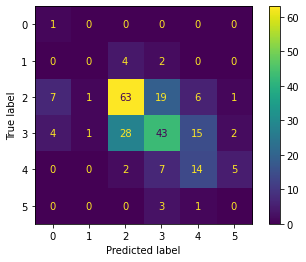

In [104]:
ConfusionMatrixDisplay(cm).plot()

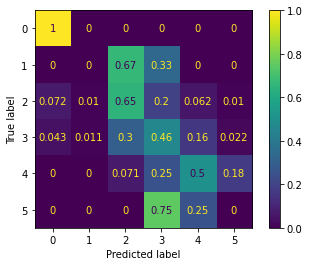

In [80]:
cm_2 = confusion_matrix(y_true = y_val,
                        y_pred = predictions,normalize = 'true')
ConfusionMatrixDisplay(cm_2).plot()

In [92]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_selector , make_column_transformer

In [97]:
ct = make_column_transformer((RobustScaler(),
                              make_column_selector(dtype_include = np.number)))

In [106]:
pipe = Pipeline([('column_transformer',ct),
                 ('clf',VotingClassifier(estimators = [('lr', clf1),
                                                       ('rf', RandomForestClassifier())]
                                         )
                 )
                 ])

In [120]:
param_grid = {}
param_grid['clf__rf__n_estimators'] = [10,20,50]
gs = GridSearchCV(estimator = pipe , 
                  param_grid = param_grid,
                  cv = 2)

In [121]:
gs.fit(X = X_train,
       y = y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('robustscaler',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7feefd323e50>)])),
                                       ('clf',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression(class_weight='balanced',
                                                                                         max_iter=10000,
                                                                                         solver='liblinear')),
                                                                     ('rf',
                                                  

In [124]:
gs.score(X_val,y_val) , gs.score(X_train,y_train)

(0.6026200873362445, 0.7562043795620438)

In [125]:
gs.best_params_

{'clf__rf__n_estimators': 50}